# Regresión

Vamos a trabajar con el dataset de paltas (*avocados*). Su descripción la pueden encontrar en https://www.kaggle.com/neuromusic/avocado-prices.

### 1. Carga de datos

a. Abrir el dataset (DS_Clase_19_Avocado.csv). Parsear fechas con la columna "Date".

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
palta = pd.read_csv('avocado.csv', delimiter=',', parse_dates=["Date"])

palta.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


b. Eliminar la columna "Unnamed: 0".

In [3]:
palta.drop('Unnamed: 0', axis = 1, inplace =True)
palta.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


c. Ordenar el dataframe de manera creciente por fecha.

In [4]:
palta.sort_values('year', inplace =True)
palta.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
10065,2015-12-06,1.49,8216.98,4787.28,85.70,0.00,3344.00,3344.00,0.00,0.0,organic,2015,Houston
10064,2015-12-13,1.35,11494.89,4757.11,93.57,0.00,6644.21,6636.26,7.95,0.0,organic,2015,Houston
10063,2015-12-20,1.27,9253.24,4463.03,88.26,0.00,4701.95,3278.23,1423.72,0.0,organic,2015,Houston
10062,2015-12-27,1.31,10598.30,4797.41,57.91,0.00,5742.98,4815.51,927.47,0.0,organic,2015,Houston


d. Resetear los índices del Dataframe

In [5]:
palta.reset_index(inplace =True, drop  =True)
palta.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-06,1.49,8216.98,4787.28,85.70,0.00,3344.00,3344.00,0.00,0.0,organic,2015,Houston
2,2015-12-13,1.35,11494.89,4757.11,93.57,0.00,6644.21,6636.26,7.95,0.0,organic,2015,Houston
3,2015-12-20,1.27,9253.24,4463.03,88.26,0.00,4701.95,3278.23,1423.72,0.0,organic,2015,Houston
4,2015-12-27,1.31,10598.30,4797.41,57.91,0.00,5742.98,4815.51,927.47,0.0,organic,2015,Houston


### 2. Análisis exploratorio de datos

a. ¿Cuáles variables son numéricas y cuáles categóricas?¿Hay NaNs?

In [6]:
# Cantidad de variables na
palta.isna().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

b. ¿Cuántas regiones hay?¿Cuántas entradas por región?

In [7]:
palta.groupby(['region']).count()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year
region,,,,,,,,,,,,
Albany,338,338,338,338,338,338,338,338,338,338,338,338
Atlanta,338,338,338,338,338,338,338,338,338,338,338,338
BaltimoreWashington,338,338,338,338,338,338,338,338,338,338,338,338
Boise,338,338,338,338,338,338,338,338,338,338,338,338
Boston,338,338,338,338,338,338,338,338,338,338,338,338
BuffaloRochester,338,338,338,338,338,338,338,338,338,338,338,338
California,338,338,338,338,338,338,338,338,338,338,338,338
Charlotte,338,338,338,338,338,338,338,338,338,338,338,338
Chicago,338,338,338,338,338,338,338,338,338,338,338,338


c. Seleccionar solamente las instancias correspondientes a la region "Chicago".

In [8]:
palta_chicago = palta[palta.region == 'Chicago']
palta_chicago.reset_index(inplace = True, drop = True)
palta_chicago.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-20,1.58,22452.30,730.65,21574.99,0.0,146.66,143.33,3.33,0.0,organic,2015,Chicago
1,2015-08-16,1.62,29458.30,1142.46,27912.51,0.0,403.33,403.33,0.00,0.0,organic,2015,Chicago
2,2015-08-23,1.61,31623.52,1517.15,29613.04,0.0,493.33,493.33,0.00,0.0,organic,2015,Chicago
3,2015-08-30,1.60,30663.55,1065.92,29017.63,0.0,580.00,580.00,0.00,0.0,organic,2015,Chicago
4,2015-09-06,1.61,28269.21,1283.81,26272.22,0.0,713.18,703.33,9.85,0.0,organic,2015,Chicago


d. ¿Cómo son los precios de las paltas en función de las distintas variables?

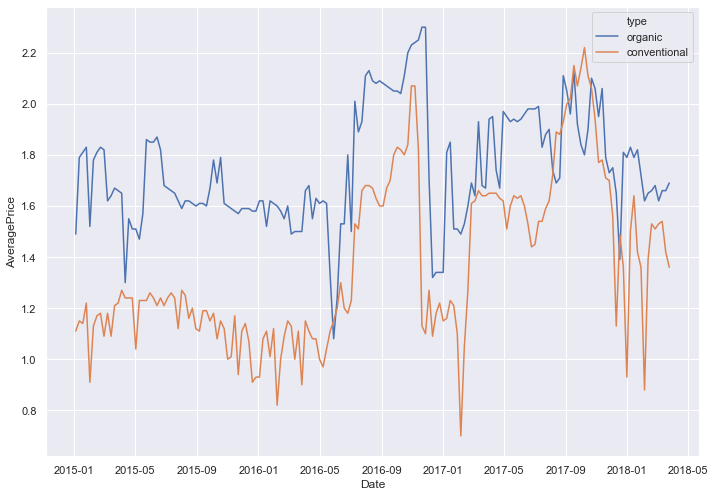

In [9]:
# sns.lineplot(x = 'Date', y = 'AveragePrice', data = palta_chicago)
sns.lineplot(x = 'Date', y = 'AveragePrice', data = palta_chicago, hue = 'type')

**Probar con otras variables**

In [10]:
# sns.lineplot(COMPLETAR)
# o usar las funciones que prefieran

#### Pasar fechas a números

A veces, en lugar de trabajar con fechas, es más fácil pasarlas a un número representativo. La siguiente celda se encarga de eso.

In [11]:
import datetime as dt
palta_chicago['Date']=palta_chicago['Date'].map(dt.datetime.toordinal)
palta_chicago.head(20)

<ipython-input-11-daad18ece39d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  palta_chicago['Date']=palta_chicago['Date'].map(dt.datetime.toordinal)


,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,735952,1.58,22452.30,730.65,21574.99,0.0,146.66,143.33,3.33,0.0,organic,2015,Chicago
1,735826,1.62,29458.30,1142.46,27912.51,0.0,403.33,403.33,0.00,0.0,organic,2015,Chicago
2,735833,1.61,31623.52,1517.15,29613.04,0.0,493.33,493.33,0.00,0.0,organic,2015,Chicago
3,735840,1.60,30663.55,1065.92,29017.63,0.0,580.00,580.00,0.00,0.0,organic,2015,Chicago
4,735847,1.61,28269.21,1283.81,26272.22,0.0,713.18,703.33,9.85,0.0,organic,2015,Chicago
5,735854,1.61,27327.18,985.56,26008.45,0.0,333.17,323.33,9.84,0.0,organic,2015,Chicago
6,735861,1.60,26935.23,1188.26,25203.64,0.0,543.33,543.33,0.00,0.0,organic,2015,Chicago
7,735868,1.67,24311.76,1213.40,23051.69,0.0,46.67,46.67,0.00,0.0,organic,2015,Chicago
8,735875,1.78,20398.64,787.10,19394.87,0.0,216.67,216.67,0.00,0.0,organic,2015,Chicago
9,735959,1.58,20995.37,1064.71,19320.66,0.0,610.00,610.00,0.00,0.0,organic,2015,Chicago


### 3. Modelos de regresión

#### Regresión Lineal 1D

Vamos a entrenar un modelo de regresión lineal entre la fecha y el precio promedio de las paltas convencionales.

In [12]:
palta_chicago_convencional = palta_chicago[palta_chicago.type == 'conventional']
palta_chicago_convencional.head(10)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
52,735644,1.17,726401.24,29711.82,488591.60,110446.60,97651.22,92518.95,5112.69,19.58,conventional,2015,Chicago
53,735637,1.13,729325.61,28216.83,499138.28,119634.41,82336.09,78980.96,3273.20,81.93,conventional,2015,Chicago
54,735630,0.91,1133491.66,50783.91,824745.44,164884.41,93077.90,89516.93,3448.62,112.35,conventional,2015,Chicago
55,735623,1.22,745439.17,26117.56,488218.44,145882.24,85220.93,75867.61,9265.81,87.51,conventional,2015,Chicago
56,735616,1.14,797741.43,24917.77,533717.99,140239.95,98865.72,95516.44,3311.71,37.57,conventional,2015,Chicago
57,735609,1.15,802874.94,31239.94,558487.79,133848.57,79298.64,74716.43,4539.25,42.96,conventional,2015,Chicago
58,735602,1.11,783068.03,30270.26,550752.19,124506.10,77539.48,72888.46,4651.02,0.00,conventional,2015,Chicago
59,735651,1.18,773078.09,39072.26,533387.47,106178.47,94439.89,90447.44,3976.51,15.94,conventional,2015,Chicago
60,735658,1.09,863391.73,24137.05,637043.16,111791.06,90420.46,88092.48,2289.01,38.97,conventional,2015,Chicago
61,735665,1.18,772997.09,27489.32,523118.00,112934.40,109455.37,107215.40,2234.66,5.31,conventional,2015,Chicago


a. Separamos las variables independientes ('Date') y dependientes ('AveragePrice'). Para trabajar con las fechas, la pasamos a números.

In [13]:
X = palta_chicago_convencional.Date.values
y = palta_chicago_convencional.AveragePrice.values
print(X.shape, y.shape)
print("Valores en X")
print(X)
print("Valores en y")
print(y)

(169,) (169,)
Valores en X
[735644 735637 735630 735623 735616 735609 735602 735651 735658 735665
 735672 735798 735791 735784 735777 735770 735763 735756 735749 735742
 735728 735721 735714 735707 735700 735693 735686 735679 735735 735805
 735812 735819 735826 735952 735945 735938 735931 735924 735917 735910
 735903 735959 735896 735882 735875 735868 735861 735854 735847 735840
 735833 735889 736001 735994 735987 735980 735973 735966 736008 736015
 736029 736155 736148 736141 736134 736127 736120 736113 736106 736022
 736099 736085 736078 736071 736064 736057 736050 736043 736036 736092
 736162 736169 736183 736176 736309 736302 736295 736288 736281 736274
 736267 736260 736316 736253 736239 736232 736225 736218 736211 736204
 736197 736190 736246 736323 736624 736631 736638 736645 736652 736659
 736666 736673 736680 736687 736694 736617 736610 736596 736435 736442
 736449 736456 736463 736470 736477 736484 736491 736498 736505 736512
 736519 736526 736533 736540 736547 736554 736561 

Hacemos un reshape para X. ¿Por qué?

In [14]:
X = X.reshape(-1,1)
print(X.shape)
print("Valores en X-Reshape")
print(X)


(169, 1)
Valores en X-Reshape
[[735644]
 [735637]
 [735630]
 [735623]
 [735616]
 [735609]
 [735602]
 [735651]
 [735658]
 [735665]
 [735672]
 [735798]
 [735791]
 [735784]
 [735777]
 [735770]
 [735763]
 [735756]
 [735749]
 [735742]
 [735728]
 [735721]
 [735714]
 [735707]
 [735700]
 [735693]
 [735686]
 [735679]
 [735735]
 [735805]
 [735812]
 [735819]
 [735826]
 [735952]
 [735945]
 [735938]
 [735931]
 [735924]
 [735917]
 [735910]
 [735903]
 [735959]
 [735896]
 [735882]
 [735875]
 [735868]
 [735861]
 [735854]
 [735847]
 [735840]
 [735833]
 [735889]
 [736001]
 [735994]
 [735987]
 [735980]
 [735973]
 [735966]
 [736008]
 [736015]
 [736029]
 [736155]
 [736148]
 [736141]
 [736134]
 [736127]
 [736120]
 [736113]
 [736106]
 [736022]
 [736099]
 [736085]
 [736078]
 [736071]
 [736064]
 [736057]
 [736050]
 [736043]
 [736036]
 [736092]
 [736162]
 [736169]
 [736183]
 [736176]
 [736309]
 [736302]
 [736295]
 [736288]
 [736281]
 [736274]
 [736267]
 [736260]
 [736316]
 [736253]
 [736239]
 [736232]
 [736225]


b. Separamos en train/test

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(135, 1)
(34, 1)
(135,)
(34,)


c. Implementamos y entrenamos el modelo de regresión lineal

In [16]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

¿Qué aprendió?

In [17]:
 print(lr.coef_)
 print(lr.intercept_)
 print(lr.rank_)

[0.00057878]
-424.7240028660659
1


Predecimos sobre los datos de train y de test.

In [18]:
from sklearn.metrics import mean_squared_error
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)
print('Error en datos de train:', mean_squared_error(y_train, y_train_pred))
print('Error en datos de test:', mean_squared_error(y_test,y_test_pred ))

Error en datos de train: 0.07443707555742352
Error en datos de test: 0.04245600054130612


Graficamos

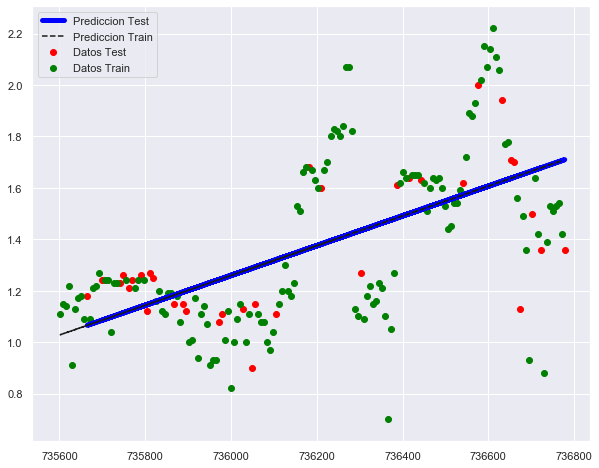

In [19]:
plt.figure(figsize = (10,8))

plt.scatter(X_test, y_test,  color='red', label = 'Datos Test')
plt.plot(X_test, y_test_pred, color='blue', linewidth=5.0, label = 'Prediccion Test')

plt.scatter(X_train, y_train,  color='green', label = 'Datos Train')
plt.plot(X_train, y_train_pred, color='k', linestyle = '--', label = 'Prediccion Train')

plt.legend()
plt.show()


#### KNN y Árboles

1. Entrenar un modelo de árbol de regresión y un modelo de KNN de regresión, primero usando las mismas variables que para la regresión lineal y después agregando más. Por ejemplo, ¿qué pasa si agregamos la variable "type"?¿Cómo trabajan estos modelos con variables categóricas?
2. Evaluar los desempeños de cada modelo. ¿Qué métricas usarían?¿Hay grandes diferencias?

## Regresión Lineal usando arbol de regresión

In [20]:
from sklearn.tree import DecisionTreeRegressor
TreeReg = DecisionTreeRegressor() # creamos un objeto arbol
TreeReg.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [21]:
y_train_predict_TreeReg=TreeReg.predict(X_train)

In [22]:
y_test_predict_TreeReg=TreeReg.predict(X_test)

In [23]:
print('Error en datos de train:', mean_squared_error(y_train, y_train_predict_TreeReg))
print('Error en datos de test:', mean_squared_error(y_test,y_test_predict_TreeReg ))

Error en datos de train: 1.0956401461402942e-33
Error en datos de test: 0.024882352941176477


In [24]:
palta_chicago_convencional.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169 entries, 52 to 337
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          169 non-null    int64  
 1   AveragePrice  169 non-null    float64
 2   Total Volume  169 non-null    float64
 3   4046          169 non-null    float64
 4   4225          169 non-null    float64
 5   4770          169 non-null    float64
 6   Total Bags    169 non-null    float64
 7   Small Bags    169 non-null    float64
 8   Large Bags    169 non-null    float64
 9   XLarge Bags   169 non-null    float64
 10  type          169 non-null    object 
 11  year          169 non-null    int64  
 12  region        169 non-null    object 
dtypes: float64(9), int64(2), object(2)
memory usage: 18.5+ KB


# Agregamos mas Features a la predicción

In [25]:
X1 = palta_chicago_convencional.drop(['AveragePrice','year','region','type'], axis=1) 
y1 = palta_chicago_convencional['AveragePrice']

Xtrain1, Xtest1, ytrain1, ytest1 = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [26]:
TreeReg.fit(Xtrain1, ytrain1) #fiteamos nuevos valores

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [27]:
y_train_predict1_TreeReg=TreeReg.predict(Xtrain1)

In [28]:
y_test_predict1_TreeReg=TreeReg.predict(Xtest1)

In [29]:
print('Error en datos de train:', mean_squared_error(ytrain1, y_train_predict1_TreeReg))
print('Error en datos de test:', mean_squared_error(ytest1,y_test_predict1_TreeReg ))

Error en datos de train: 1.0956401461402942e-33
Error en datos de test: 0.024400000000000005


 **No se observan cambios significativos en el modelo**

## KNN

In [30]:
from sklearn.neighbors import KNeighborsRegressor
# instantiate the model and set the number of neighbors to consider to 3
reg = KNeighborsRegressor()
#reg = KNeighborsRegressor(n_neighbors=5)

In [31]:
# fit the model using the training data and training targets
reg.fit(X_train, y_train) 
ypredknn=reg.predict(X_train)

In [32]:
regKnn_mse=mean_squared_error(y_train, ypredknn)
rmses_train=np.sqrt(regKnn_mse)
print("RMSE para KNN Train")
print(rmses_train)

RMSE para KNN Train
0.11173009807037142


In [33]:
ypredknn=reg.predict(X_test)
regKnn_mse=mean_squared_error(y_test, ypredknn)
rmses_test=np.sqrt(regKnn_mse)
print("RMSE para KNN Test")
print(rmses_test)

RMSE para KNN Test
0.09180990591177737


## Evaluando Modelos

## Se usara Cross Validation

In [34]:
#calculo del RMSE
def nmsq2rmse(score):
    return np.round(np.sqrt(-score), 2)

In [35]:
#Cross Validation on Linear Regression
from sklearn.model_selection import cross_val_score
# Indicamos que queremos hacer cross validation con 10 cortes. 
# Es decir vamos a iterar 10 veces y obtener los scores de cada iteración
scores = cross_val_score(lr,X_train,y_train,
                             scoring="neg_mean_squared_error", cv=10)

In [36]:
rmse_lr_scores=nmsq2rmse(scores)
print("Scores Linear Regression")
print("Scores: ", rmse_lr_scores)
print("Promedio: ", rmse_lr_scores.mean())
print("Desvío estandar: ", rmse_lr_scores.std())

Scores Linear Regression
Scores:  [0.4  0.2  0.25 0.25 0.25 0.19 0.29 0.32 0.27 0.28]
Promedio:  0.27
Desvío estandar:  0.05692099788303084


In [37]:
#Cross Validation on Tree Regressor
scores = cross_val_score(TreeReg, X_train, y_train,
                             scoring="neg_mean_squared_error", cv=10)

In [38]:
rmse_tr_scores=nmsq2rmse(scores)
print("Scores tree Regression")
print("Scores: ", rmse_tr_scores)
print("Promedio: ", rmse_tr_scores.mean())
print("Desvío estandar: ", rmse_tr_scores.std())

Scores tree Regression
Scores:  [0.21 0.07 0.07 0.09 0.17 0.08 0.09 0.17 0.19 0.21]
Promedio:  0.135
Desvío estandar:  0.05678908345800274


In [41]:
#Cross Validation on Knn Regressor
scores = cross_val_score(reg, X_train, y_train,
                             scoring="neg_mean_squared_error", cv=10)

In [42]:
rmse_knn_scores=nmsq2rmse(scores)
print("Scores Linear Regression")
print("Scores: ", rmse_knn_scores)
print("Promedio: ", rmse_knn_scores.mean())
print("Desvío estandar: ", rmse_knn_scores.std())

Scores Linear Regression
Scores:  [0.24 0.06 0.05 0.17 0.08 0.08 0.16 0.21 0.18 0.16]
Promedio:  0.13899999999999998
Desvío estandar:  0.06315853069855251
